In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#import the Data
data = pd.read_csv('data.csv')

In [3]:
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
from sklearn.utils import shuffle
data = shuffle(shuffle(data))

y = data['character']
X = data.drop('character',axis=1)

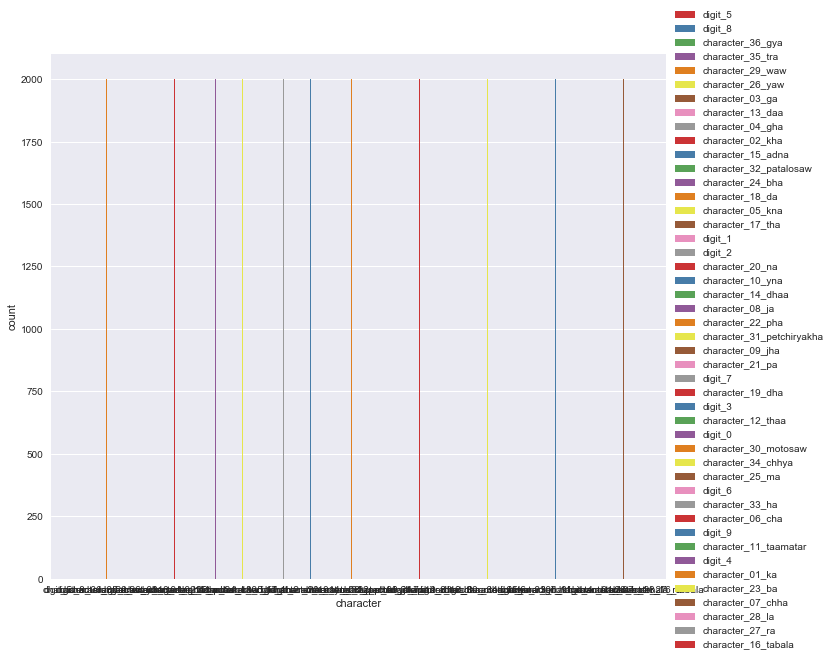

In [5]:
#Data Analysis
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y, hue=y, palette='Set1')
plt.tight_layout()
plt.legend(bbox_to_anchor= (1,1.1))


C:\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


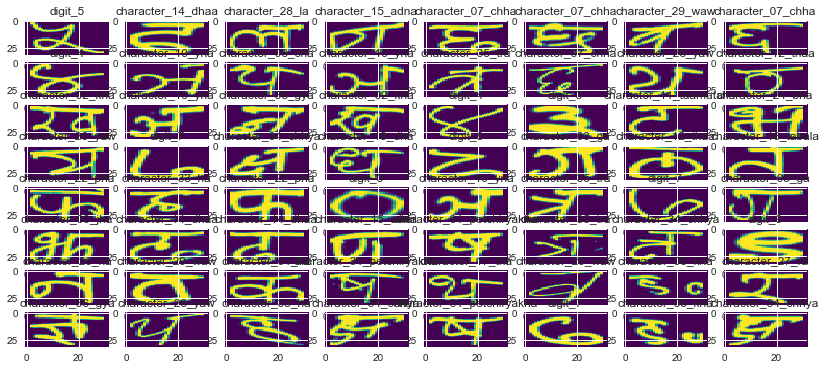

In [6]:
#visialisation of  digits

#Creating as function to show the imgaes
def show_image(img, shape, label , cmp = 'gray'):
    img = np.reshape(img, shape)
    plt.imshow(img, cmap = cmp, aspect='auto', interpolation='None')
    plt.tight_layout
    plt.title(label)
#----------------------------------------------------------------------------
#plotting the grid of images  
plt.figure(figsize=(14,6))
x,z = 8,8
for i in range(0,(x*z)):
    plt.subplot(x,z,i+1) # creating the subplot area for the grid
    img_no = np.random.randint(0,len(data),1)[0] # getting the random number with in the range 
    #and will use as an index to get the image data from dataframe
    lbl = str(y.iloc[img_no]) # getting the lable to plot on the title of the image 
    show_image(X.iloc[img_no],(32,32),lbl, 'viridis') # passing the data so as to get the image on grid
plt.show()


In [7]:
# transforming the data to get normalised data frame
X = X/255.0

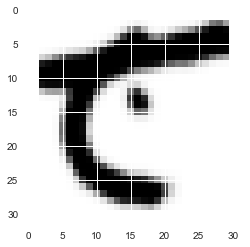

In [8]:
plt.imshow(X.iloc[1].values.reshape(32,32))

In [9]:
# trainign the model using neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [10]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
#initializing the classifier
nn = MLPClassifier(hidden_layer_sizes=(3072),batch_size=50,verbose=3,learning_rate='constant',momentum=1,random_state=2)

In [12]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.73327883
Iteration 2, loss = 0.25319137
Iteration 3, loss = 0.15657762
Iteration 4, loss = 0.11434928
Iteration 5, loss = 0.09001274
Iteration 6, loss = 0.07991410
Iteration 7, loss = 0.07354114
Iteration 8, loss = 0.06887287
Iteration 9, loss = 0.06980391
Iteration 10, loss = 0.06312260
Iteration 11, loss = 0.06568228
Iteration 12, loss = 0.06570098
Iteration 13, loss = 0.06403249
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3072, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=1,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=3,
       warm_start=False)

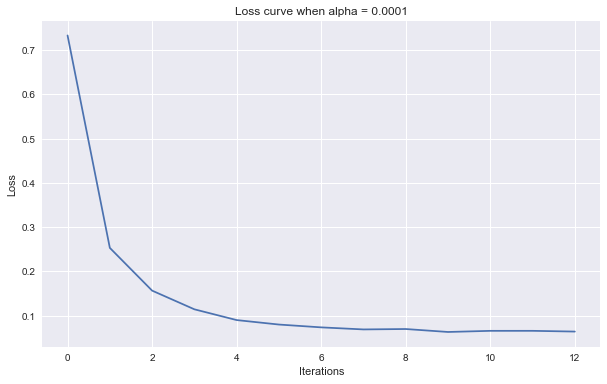

In [13]:
# visiualising the loss 

plt.figure(figsize=(10,6))
plt.plot(nn.loss_curve_)
plt.title('Loss curve when alpha = 0.0001')
plt.xlabel('Iterations')
plt.ylabel('Loss')


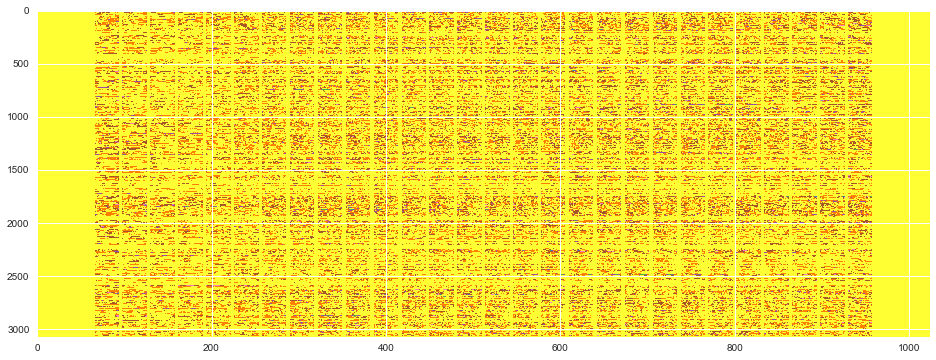

In [18]:
#visiulising theweights at hidden layer
fig,ax = plt.subplots(1,1, figsize =(16,6))
ax.imshow((np.transpose(nn.coefs_[0])), cmap ='Set1', aspect = 'auto')

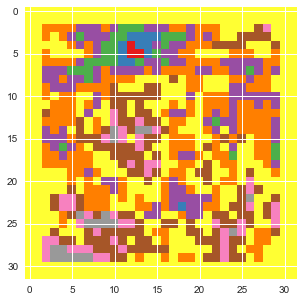

In [23]:
#visiualising the hidden layer neuron 
fig,ax = plt.subplots(1,figsize=(5,5))
hiddenUnit2 = np.transpose(nn.coefs_[0])[2]  # getting the Weights fro mnueron 2 from hidden layer and plotting it.
ax.imshow(hiddenUnit2.reshape(32,32),cmap ='Set1')

In [24]:
#Predicting the Test Data

pred = nn.predict(X_test)

In [25]:
#Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(pred,y_test))
print (confusion_matrix(pred,y_test))

                           precision    recall  f1-score   support

          character_01_ka       0.98      0.96      0.97       663
         character_02_kha       0.96      0.89      0.92       628
          character_03_ga       0.96      0.96      0.96       600
         character_04_gha       0.88      0.92      0.90       555
         character_05_kna       0.93      0.95      0.94       589
         character_06_cha       0.93      0.96      0.94       602
        character_07_chha       0.94      0.92      0.93       585
          character_08_ja       0.94      0.95      0.95       593
         character_09_jha       0.98      0.98      0.98       559
         character_10_yna       0.96      0.96      0.96       615
    character_11_taamatar       0.96      0.95      0.96       572
        character_12_thaa       0.95      0.98      0.96       572
         character_13_daa       0.93      0.93      0.93       607
        character_14_dhaa       0.93      0.95      0.94     